In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [9]:
in_shape = (100, 100, 3) # input image

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape, name="conv2D_1"))
model.add(MaxPooling2D((2, 2), name="MaxPool_1"))

model.add(Conv2D(64, (3,3), activation='relu', name="conv2D_2"))
model.add(MaxPooling2D((2, 2), name="MaxPool_2"))

model.add(Conv2D(128, (3,3), activation='relu', name="conv2D_3"))
model.add(MaxPooling2D((2, 2), name="MaxPool_3"))

model.add(Flatten())

model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 49, 49, 32)        0         
                                                                 
 conv2D_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 23, 23, 64)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 MaxPool_3 (MaxPooling2D)    (None, 10, 10, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 12800)            

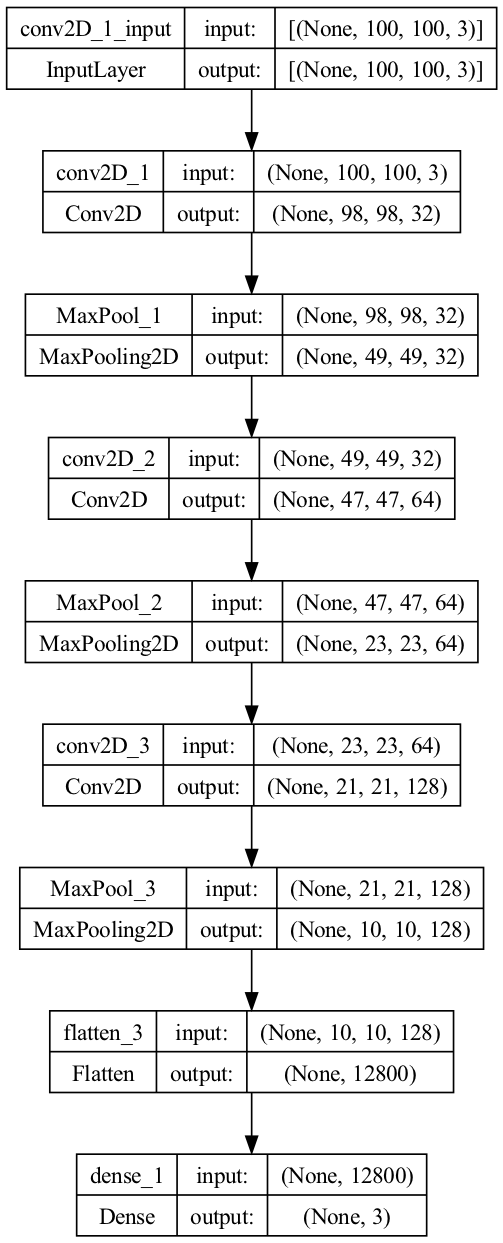

In [10]:
import pydotplus
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_convolu.png', show_shapes=True, show_layer_names=True, dpi=120)

<h3>Kenel</h3>

In [11]:
for layer in model.layers:
    print(layer.name)

conv2D_1
MaxPool_1
conv2D_2
MaxPool_2
conv2D_3
MaxPool_3
flatten_3
dense_1


In [13]:
for layer in model.layers: # filter conv2D
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    print(layer.name, 'shape:', kernels.shape)

conv2D_1 shape: (3, 3, 3, 32)
conv2D_2 shape: (3, 3, 32, 64)
conv2D_3 shape: (3, 3, 64, 128)


In [14]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [15]:
kernels

array([[[[-0.11038159,  0.03078832, -0.11307002, -0.10913433,
           0.0323409 ,  0.04895245, -0.09271032,  0.03300443,
          -0.06787242,  0.09352523, -0.07479288,  0.04389226,
          -0.08507635, -0.09006433,  0.13525973, -0.10414588,
          -0.13528022, -0.09618083,  0.11456911,  0.02449858,
          -0.06437986,  0.05470803, -0.10541184, -0.00554076,
           0.1142789 ,  0.08286992, -0.13190468,  0.00680321,
          -0.12129897, -0.13269772,  0.06694944,  0.03629126],
         [-0.01036689, -0.09460063,  0.13743792, -0.07507181,
          -0.12409572, -0.11400676,  0.11665045,  0.01204391,
          -0.06696773,  0.07462302,  0.04951781, -0.13192515,
          -0.08160985, -0.04432223, -0.10738488,  0.0668148 ,
           0.12689857,  0.05805305,  0.09082799, -0.0435125 ,
           0.12282832, -0.08697111, -0.07371883, -0.01877263,
          -0.01378501, -0.00268464, -0.11076707, -0.02936903,
          -0.04386202,  0.01312612, -0.13737231,  0.02036066],
      

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [17]:
kernel_idx = 1
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[ 0.03 -0.04 -0.02]
 [-0.03  0.04  0.1 ]
 [ 0.03  0.13  0.03]]


([], [])

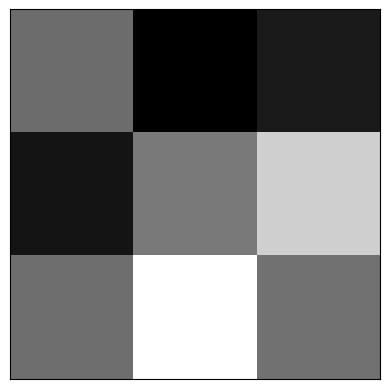

In [18]:
plt.imshow(kernel_i, cmap='gray')
plt.xticks([])
plt.yticks([])

In [19]:
layername = model.layers[model_layer_idx].name
layername

'conv2D_1'

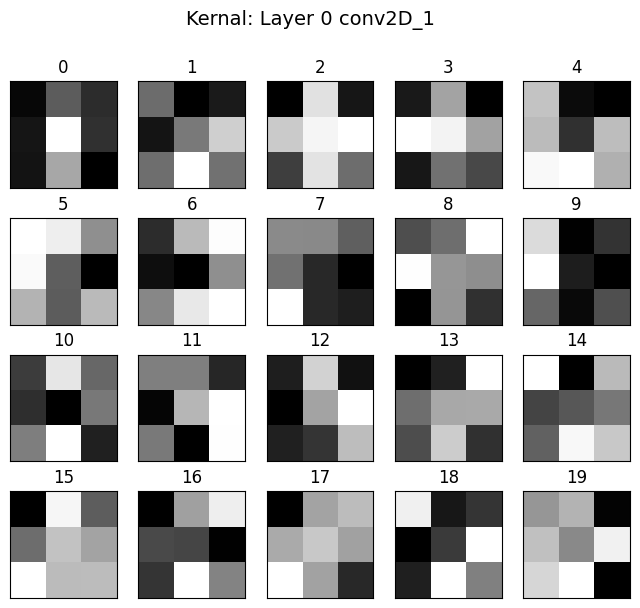

In [20]:
nplots = 20
fig = plt.figure(figsize=(8, 6.8))

fig.suptitle(f'Kernal: Layer {model_layer_idx} {layername}', fontsize=14)

for j in range(nplots):
    plt.subplot(4, 5, j+1)
    plt.imshow(kernels[:, :, 0, j], cmap='gray')
    plt.title(j)
    plt.xticks([])
    plt.yticks([])
    
plt.show()
